# KNN En Yakın Komşu **Algoritması**

In [ ]:
#knn algoritması veri noktalarının benzerliklerine göre gruplandırmayı sağlayan makine öğrenmesi algoritması.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#meme Kanseri veri seti
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-20230729T092515Z-001/breast_cancer_data.csv')


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
        "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
        "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]

y = df["diagnosis"]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# eğitim ve test verileri ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#k-NN modelini tanımlama ve eğitme
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
#Modeli eğitimi
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#modeli test etme
from sklearn.metrics import accuracy_score
print("Eğitim verisi için doğruluk",knn.score(X_train,y_train))
print("Test verisi için doğruluk",knn.score(X_test,y_test))

Eğitim verisi için doğruluk 0.9406593406593406
Test verisi için doğruluk 0.956140350877193


Text(0.5, 1.0, 'Confusion Matrisi')

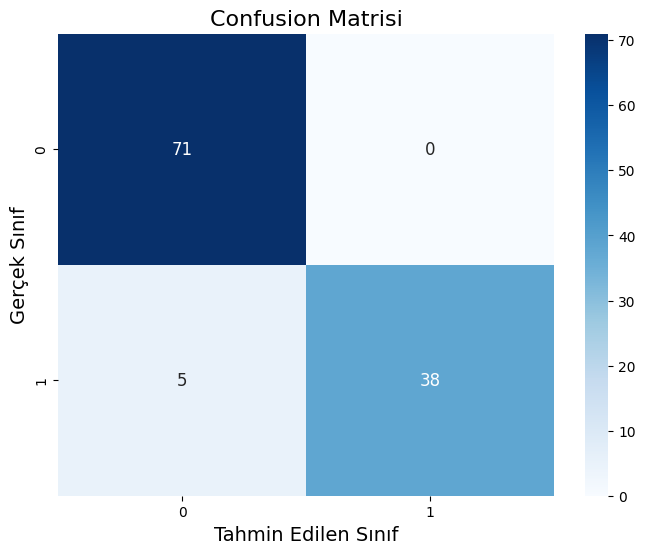

In [ ]:
#modeli görselleştirme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrisini hesaplama
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrisini görselleştirme
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)

Sonuç olarak hasta olmayan 76 veriden 71 tanesini doğru tahmin edip 5 tanesini yanlış tahmin etti 43 tane hasta olan kişiden 38 tanesini doğru tahmin etti

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

